In [119]:
#LSTM

In [120]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [121]:
df= pd.read_csv("E:\\final year project\\project\\df.csv", parse_dates=['Date'], index_col="Date")
df

,Index
Date,
2021-07-13,2871.04
2021-07-12,2854.77
2021-07-11,2899.82
2021-07-08,2824.90
2021-07-07,2801.13
...,...
2014-02-06,785.78
2014-02-05,781.38
2014-02-04,774.91


In [122]:
df_1=df.iloc[::-1]
df_1

,Index
Date,
2014-02-02,775.92
2014-02-03,769.51
2014-02-04,774.91
2014-02-05,781.38
2014-02-06,785.78
...,...
2021-07-07,2801.13
2021-07-08,2824.90
2021-07-11,2899.82


<ipython-input-123-66eec3124ccf>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


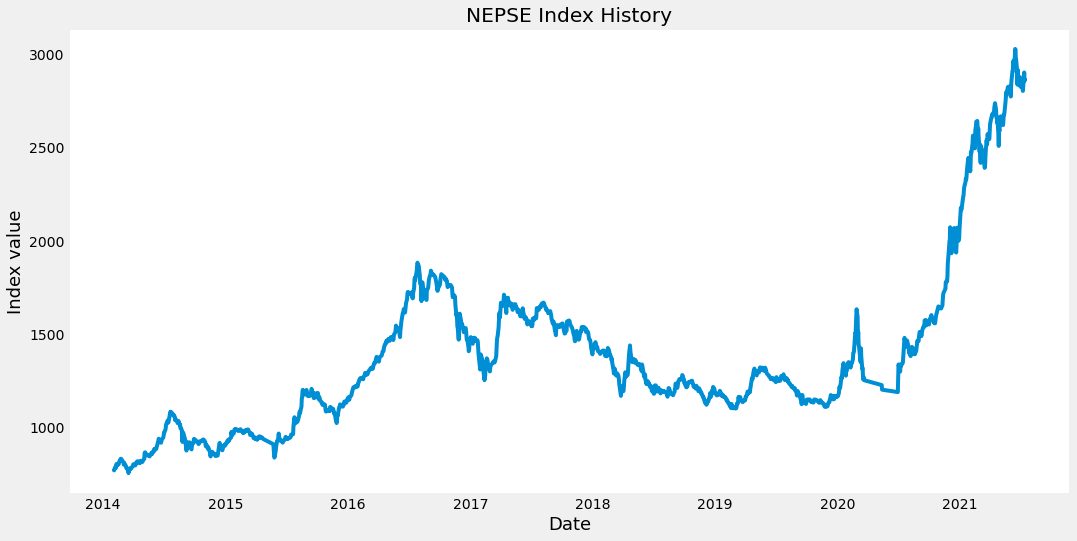

In [123]:
plt.figure(figsize=(16,8))
plt.title('NEPSE Index History')
plt.plot(df['Index'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Index value', fontsize=18)
ax = plt.axes()
plt.grid(False)
ax.set_facecolor("White")
plt.show()

In [124]:
#convert the dataframe to numpy array
dataset=df_1.values
#Get the number of rows to train the model on
training_data_len= math.ceil(len(dataset)*.8)

training_data_len

1344

In [125]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00921685],
       [0.00639411],
       [0.00877208],
       ...,
       [0.94450952],
       [0.92467105],
       [0.9318358 ]])

In [126]:
#create the training data set

train_data = scaled_data[0:training_data_len,:]
#split the data

x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00921685, 0.00639411, 0.00877208, 0.01162125, 0.01355886,
       0.01277501, 0.0211992 , 0.0183016 , 0.01908545, 0.02118599,
       0.02040214, 0.02146342, 0.02623258, 0.02980395, 0.03385091,
       0.03298339, 0.03278522, 0.03113826, 0.0246825 , 0.01984288,
       0.02443149, 0.02230893, 0.01827958, 0.01698931, 0.01453207,
       0.01123813, 0.01236987, 0.00596695, 0.        , 0.00436843,
       0.00893502, 0.00870603, 0.01222895, 0.01122932, 0.01146272,
       0.0124007 , 0.0163816 , 0.02025682, 0.02112434, 0.02007627,
       0.01865389, 0.01802857, 0.02057829, 0.02481461, 0.02759331,
       0.02800285, 0.02486745, 0.02471773, 0.02354195, 0.02338342,
       0.02663332, 0.02879551, 0.02802047, 0.02605644, 0.0269768 ,
       0.03005496, 0.03334449, 0.04690335, 0.04690335, 0.04899509])]
[0.044816015219037886]

[array([0.00921685, 0.00639411, 0.00877208, 0.01162125, 0.01355886,
       0.01277501, 0.0211992 , 0.0183016 , 0.01908545, 0.02118599,
       0.02040214, 0.02146342, 0.0

In [127]:
#convert the x_train and y_train to numpy array

x_train, y_train = np.array(x_train), np.array(y_train)


In [128]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [129]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [130]:
#Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [131]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1284/1284 [==============================] - 22s 16ms/step - loss: 6.2754e-04


In [132]:
#create the testing data set
test_data = scaled_data[training_data_len - 60:,:]

x_test = []
y_test = dataset[training_data_len:,:]

for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [133]:
#convert the data to a numpy array

x_test = np.array(x_test)


In [134]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [135]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [136]:
#Get the root mean squared error (RMSE)

rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

103.748165456882

In [137]:
#Plot the data

train = df_1[:training_data_len]
valid = df_1[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-137-3f6c19d50578>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<ipython-input-138-68c1f1660bb8>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


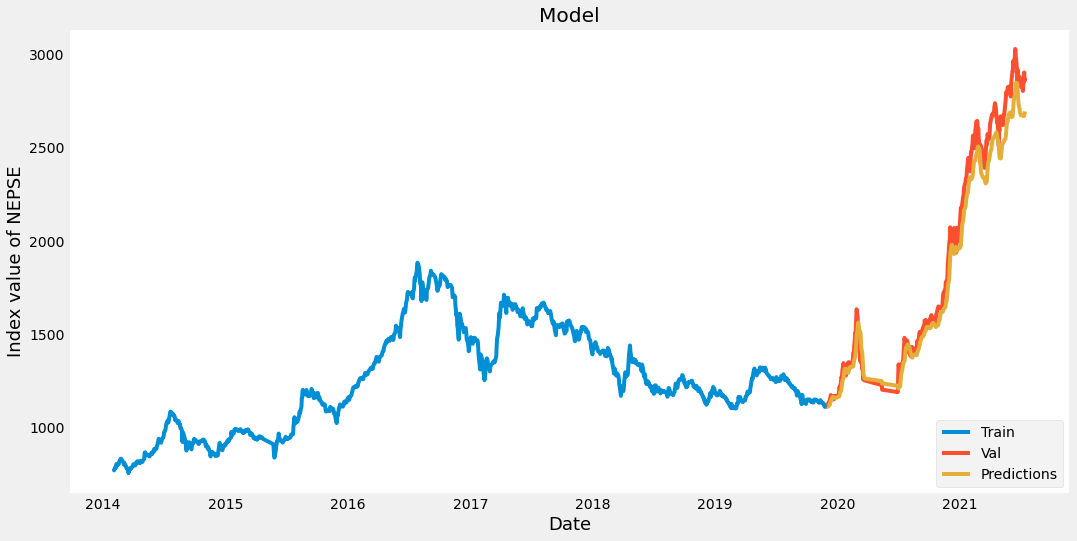

In [138]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Index value of NEPSE', fontsize=18)
plt.plot(train['Index'])
plt.plot(valid[['Index','Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
ax = plt.axes()
plt.grid(False)
ax.set_facecolor("White")
plt.show()


In [139]:
valid

,Index,Predictions
Date,,
2019-12-01,1112.86,1112.371582
2019-12-02,1111.99,1111.401978
2019-12-03,1115.75,1110.935425
2019-12-04,1124.47,1111.291626
2019-12-05,1131.92,1113.162476
...,...,...
2021-07-07,2801.13,2670.922852
2021-07-08,2824.90,2667.921631
2021-07-11,2899.82,2667.592041


In [147]:
print(valid.tail(20))


              Index  Predictions
Date                            
2021-06-16  2969.70  2839.313232
2021-06-17  2968.43  2845.143799
2021-06-20  2905.15  2841.842285
2021-06-21  2834.41  2823.169678
2021-06-22  2913.85  2787.419678
2021-06-23  2862.19  2759.649170
2021-06-24  2843.00  2731.933350
2021-06-27  2870.38  2706.278564
2021-06-28  2875.50  2690.403809
2021-06-29  2828.01  2683.708008
2021-06-30  2823.88  2676.683105
2021-07-01  2843.00  2670.775635
2021-07-04  2834.52  2669.725342
2021-07-05  2822.74  2670.607178
2021-07-06  2818.11  2671.109131
2021-07-07  2801.13  2670.922852
2021-07-08  2824.90  2667.921631
2021-07-11  2899.82  2667.592041
2021-07-12  2854.77  2680.330078
2021-07-13  2871.04  2691.533447


In [141]:
valid['Index']

Date
2019-12-01    1112.86
2019-12-02    1111.99
2019-12-03    1115.75
2019-12-04    1124.47
2019-12-05    1131.92
               ...   
2021-07-07    2801.13
2021-07-08    2824.90
2021-07-11    2899.82
2021-07-12    2854.77
2021-07-13    2871.04
Name: Index, Length: 336, dtype: float64

In [142]:
y_true=np.array(valid['Index'])
y_true


array([1112.86, 1111.99, 1115.75, 1124.47, 1131.92, 1135.38, 1148.89,
       1151.37, 1161.48, 1172.65, 1167.87, 1154.12, 1155.38, 1152.07,
       1149.65, 1150.82, 1168.58, 1166.22, 1168.04, 1167.42, 1162.43,
       1167.96, 1166.04, 1169.5 , 1166.22, 1182.31, 1200.7 , 1216.93,
       1209.6 , 1213.12, 1255.72, 1270.87, 1263.38, 1284.23, 1310.23,
       1343.66, 1317.12, 1320.47, 1313.42, 1297.48, 1276.68, 1300.63,
       1306.15, 1305.88, 1325.39, 1346.65, 1349.14, 1337.05, 1342.36,
       1333.69, 1319.99, 1324.27, 1341.38, 1345.98, 1344.59, 1363.98,
       1398.24, 1400.01, 1405.26, 1434.58, 1504.14, 1502.18, 1545.2 ,
       1596.13, 1632.18, 1591.36, 1495.3 , 1509.68, 1441.2 , 1435.7 ,
       1349.32, 1423.09, 1377.18, 1313.04, 1316.4 , 1272.07, 1255.8 ,
       1269.31, 1251.46, 1226.16, 1201.58, 1188.71, 1260.76, 1336.53,
       1298.73, 1336.67, 1326.54, 1331.11, 1340.29, 1342.41, 1347.45,
       1362.35, 1394.77, 1479.03, 1464.94, 1449.95, 1432.45, 1442.62,
       1465.11, 1462

In [143]:
y_pred=np.array(valid['Predictions'])
y_pred

array([1112.3716, 1111.402 , 1110.9354, 1111.2916, 1113.1625, 1116.6625,
       1121.187 , 1127.3945, 1134.1998, 1141.7188, 1150.0646, 1157.3092,
       1161.2589, 1162.6956, 1161.919 , 1159.5243, 1156.5331, 1155.6565,
       1155.9951, 1157.2979, 1158.9789, 1160.0912, 1161.3472, 1162.3131,
       1163.3887, 1164.0165, 1166.1996, 1171.3218, 1179.6566, 1188.1381,
       1196.0361, 1207.658 , 1222.045 , 1235.4707, 1249.0559, 1264.1368,
       1282.3231, 1296.8744, 1307.5697, 1313.46  , 1313.4982, 1307.2053,
       1300.6187, 1295.3785, 1291.6854, 1291.8827, 1297.1813, 1305.402 ,
       1312.9581, 1319.7607, 1324.1138, 1324.6456, 1323.2012, 1322.8018,
       1323.7123, 1325.1986, 1329.2705, 1338.7164, 1350.6036, 1363.1647,
       1378.1566, 1401.4629, 1426.7643, 1455.4818, 1489.0245, 1525.7611,
       1554.182 , 1560.8645, 1554.6774, 1532.151 , 1501.7451, 1459.4971,
       1424.8883, 1393.8745, 1361.4849, 1333.0549, 1305.4982, 1280.2671,
       1261.55  , 1247.3732, 1235.006 , 1222.5199, 

In [144]:
r2_score(y_true, y_pred)

0.9704204493411582

In [145]:
r2_score(y_true, y_pred,multioutput='variance_weighted')

0.9704204493411582